<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/DL/08_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망(CNN)

인공 신경망은 이미지 픽셀을 일렬로 펼쳐서 입력 데이터 전체에 대해 가중치를 적용했다면
<br><br>
CNN은 일부에 가중치를 곱한다. -> 모서리, 선, 질감 같은 국소 특징을 먼저 학습

필터 크기 만큼의 가중치 필요(밀집층에선 인공 신경망과 같은 계산 방식)

위치마다 같은 가중치와 필터마다 같은 절편(필터,커널)을 사용해 출력을 만듬 합성곱 신경망(CNN)


뉴런이 입력 위를 이동하면서 출력을 만들기에 **뉴런** 대신에 **필터,커널**로 부름.

합성곱 층에서 여러 개의 필터 사용 가능(여러 특징 추출)
  
파라미터 수가 급감

처음에는 간단한 기본적인 특징을 찾고 층이 깊어질수록 다양하고 구체적인 특징을 감지할 수 있도록 필터의 개수를 늘림. 또 너비와 높이 차원을 줄여 어느 위치에 특징이 있어도 감지할 수 있게함

층이 깊어질수록 보는 영역이 3X3 -> 5X5 -> 7X7이렇게 커짐 = 특성이 조합됨
<br><br>

###출력 맵(feature map)
합성곱 계산을 통해 얻은 출력 배열(활성화 함수 적용 후)
<br><br>
###Padding
입력 배열 주위를 가상의 원소로 채움 -> 더 큰 특성 맵 만들기 위해

사용 이유 : 쓰지 않으면 모서리 픽셀은 한 번만 쓰여서  그쪽 정보가 잘 전달되지 않음(균일 하지 않음)

Same Padding -> 특성 입력, 특성 맵의 크기를 동일하게 만드는 패딩

Valid Padding -> 패딩 없이 순수한 입력 사용
<br><br>

###Stride
합성곱 연산시 이동하는 칸 수
<br><br>
###Pooling
feature map크기 줄이면서 중요한 정보만 남김(맵의 개수는 그대로, 가로세로만 줄임)

일반적으로 입력층 겹치지 않게 stride 자동 설정됨

층이긴하나 가중치, 패딩 없고 풀링 크기와 스트라이드 크기가 동일

max pooling -> 최대값으로(많이씀)

average pooling -> 평균값으로



### 절차

입력층 -> 출력 맵 -> 풀링 -> 반복 -> Flatten -> Dense -> Output

In [13]:
import keras

# 10=필터 개수, kernel_size=커널(필터) 크기, activation = 활성화 함수
# padding->테두리 처리 방식(same,valid), strides = 필터 이동 크기( (1,1)처럼 아래,오른쪽 이동 각각 지정도 가능)
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

# 2X2크기 풀링층 생성(가로세로를 절반으로 줄임), (2,3)이렇게 각각 지정도 가능
# strides, padding 설정 가능 기본값(풀링의 크기, valid)
keras.layers.MaxPooling2D(2)
# keras.layers.MaxPooling2D(2, strides=2, padding='valid')
keras.layers.AveragePooling2D(2)



<AveragePooling2D name=average_pooling2d_1, built=True>

### 이미지 분류
keras에서 입력 이미지는 항상 깊이가 존재해야함 흑백 이미지는 (x,y,1)형식으로 바꿔야함



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.7346 - loss: 0.7302 - val_accuracy: 0.8754 - val_loss: 0.3351
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.8671 - loss: 0.3659 - val_accuracy: 0.8942 - val_loss: 0.2834
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.8884 - loss: 0.3099 - val_accuracy: 0.9069 - val_loss: 0.2601
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.9020 - loss: 0.2716 - val_accuracy: 0.9056 - val_loss: 0.2497
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9106 - loss: 0.2462 - val_accuracy: 0.9139 - val_loss: 0.2373
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9193 - loss: 0.2182 - val_accuracy: 0.9175 - val_loss: 0.2244
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9223 - loss: 0.2083 - val_accuracy: 0.9203 - val_loss: 0.2187
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9

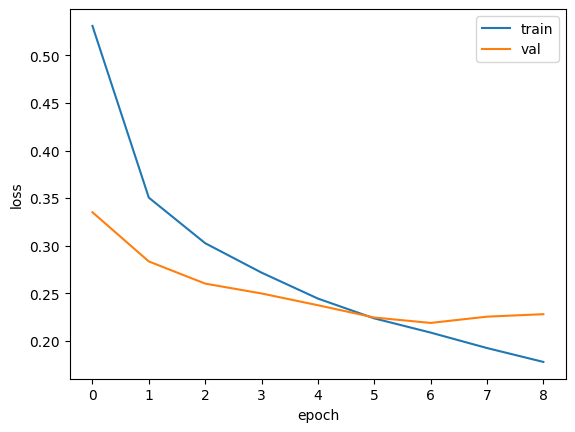

In [19]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# -1 = 이미지 개수 자동, (28,28,1)->각 이미지 크기, (48000,28,28)을(48000,28,28,1)로 변환
train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target= train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

model= keras.Sequential()
# 입력층 크기 지정
model.add(keras.layers.Input(shape=(28,28,1)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2))) # 풀링 후 크기 = (14,14,32)
# 두 번째 합성곱-풀링 층 추가
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2,2))) # 풀링 후 크기 (7,7,64)

# 일렬로 펼침
model.add(keras.layers.Flatten())
# 밀집층 여러개 -> 단순 선형보다 복잡한 결정 경계 생성 가능
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))


"""
필터 크기*깊이*필터 개수 + bias
3*3*1*32+32=320
3*3*32*64+64=18496
3136*100+100=313700
"""
# 모델 요약(param계산 해보기)
print(model.summary())

# 모델 구성을 그림으로 표현
# keras.utils.plot_model(model, show_shapes=True)

# 모델 컴파일, 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 손실 그래프 출력

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9201 - loss: 0.2163


[0.21870902180671692, 0.9203333258628845]

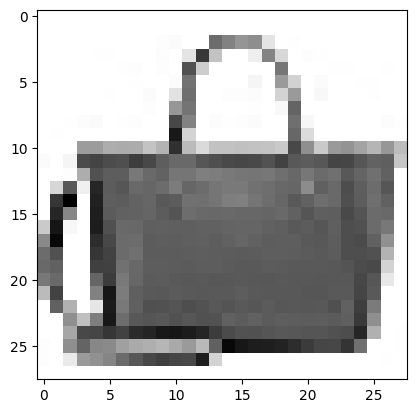

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[4.5649356e-18 9.8957503e-25 3.6714285e-19 8.9552856e-18 3.5457317e-20
  1.0848315e-15 3.5693521e-16 2.9329794e-16 1.0000000e+00 2.9981697e-14]]
가방
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9126 - loss: 0.2500
[0.24059946835041046, 0.9121999740600586]


In [25]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

preds= model.predict(val_scaled[0:1])
print(preds)

classes=['티셔츠','바지','스웨터','드레스', '코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

test_scaled = test_input.reshape(-1,28,28,1) /255.0
print(model.evaluate(test_scaled, test_target))